In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.chdir('D:/vmware')

In [2]:
dataset = pd.read_csv('enron_cleaned_sent_emails.csv')

In [3]:
dataset.head(10)

,file,body
0,allen-p/_sent_mail/1.,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Let's shoot for Tuesday at 11:45.
5,allen-p/_sent_mail/1002.,"Greg,\n\n How about either next Tuesday or Thu..."
6,allen-p/_sent_mail/1003.,Please cc the following distribution list with...
7,allen-p/_sent_mail/1004.,any morning between 10 and 11:30
8,allen-p/_sent_mail/101.,1. login: pallen pw: ke9davis\n\n I don't thi...
9,allen-p/_sent_mail/102.,---------------------- Forwarded by Phillip K ...


In [4]:
df = dataset["file"].str.split("/", n = 2, expand = True)
dataset["Name"]= df[0]
dataset['mail_status'] = df[1]
dataset['file_no'] = df[2]

In [5]:
dataset.head(5)

,file,body,Name,mail_status,file_no
0,allen-p/_sent_mail/1.,Here is our forecast\n\n,allen-p,_sent_mail,1.
1,allen-p/_sent_mail/10.,Traveling to have a business meeting takes the...,allen-p,_sent_mail,10.
2,allen-p/_sent_mail/100.,test successful. way to go!!!,allen-p,_sent_mail,100.
3,allen-p/_sent_mail/1000.,"Randy,\n\n Can you send me a schedule of the s...",allen-p,_sent_mail,1000.
4,allen-p/_sent_mail/1001.,Let's shoot for Tuesday at 11:45.,allen-p,_sent_mail,1001.


In [6]:
dataset['Name'].value_counts()

mann-k            8926
kaminski-v        8644
dasovich-j        5366
germany-c         5128
shackleton-s      4407
jones-t           4123
bass-e            3030
lenhart-m         2759
beck-s            2674
symes-k           2649
scott-s           2602
taylor-m          2409
love-p            2371
arnold-j          2353
perlingiere-d     2352
nemec-g           2175
fossum-d          2067
sanders-r         2035
giron-d           1880
lavorato-j        1868
kean-s            1834
rogers-b          1822
delainey-d        1814
mcconnell-m       1756
farmer-d          1715
allen-p           1509
sager-e           1476
rodrique-r        1442
steffes-j         1379
stclair-c         1328
                  ... 
wolfe-j             93
gang-l              90
townsend-j          82
arora-h             78
pimenov-v           78
stepenovitch-j      76
swerzbin-m          73
solberg-g           60
badeer-r            59
reitmeyer-j         57
donohoe-t           52
ring-r              51
slinger-r  

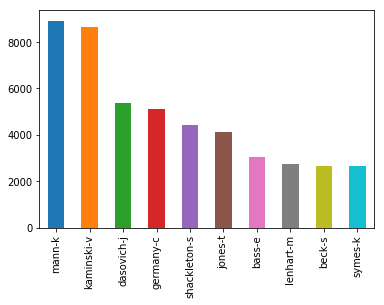

In [7]:
temp = dataset['Name'].value_counts()
temp.head(10).plot(kind='bar')

In [9]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfTransformer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(dataset['body'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(text_counts)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tfidf, dataset['Name'], test_size=0.3, random_state=0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

In [ ]:
from sklearn import model_selection, svm
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf1 = SVM.fit(X_train, y_train)
predicted= clf1.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))